In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import os
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data file.csv')

In [3]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [4]:
df= df.drop(["pcircle","pdate","Unnamed: 0","msisdn"],axis=1)
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [5]:
X = df.drop(["label"],axis=1)
X 

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [6]:
y = df["label"]
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 209593, dtype: int64

In [7]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [8]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [9]:
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

In [10]:
df.shape

(209593, 33)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

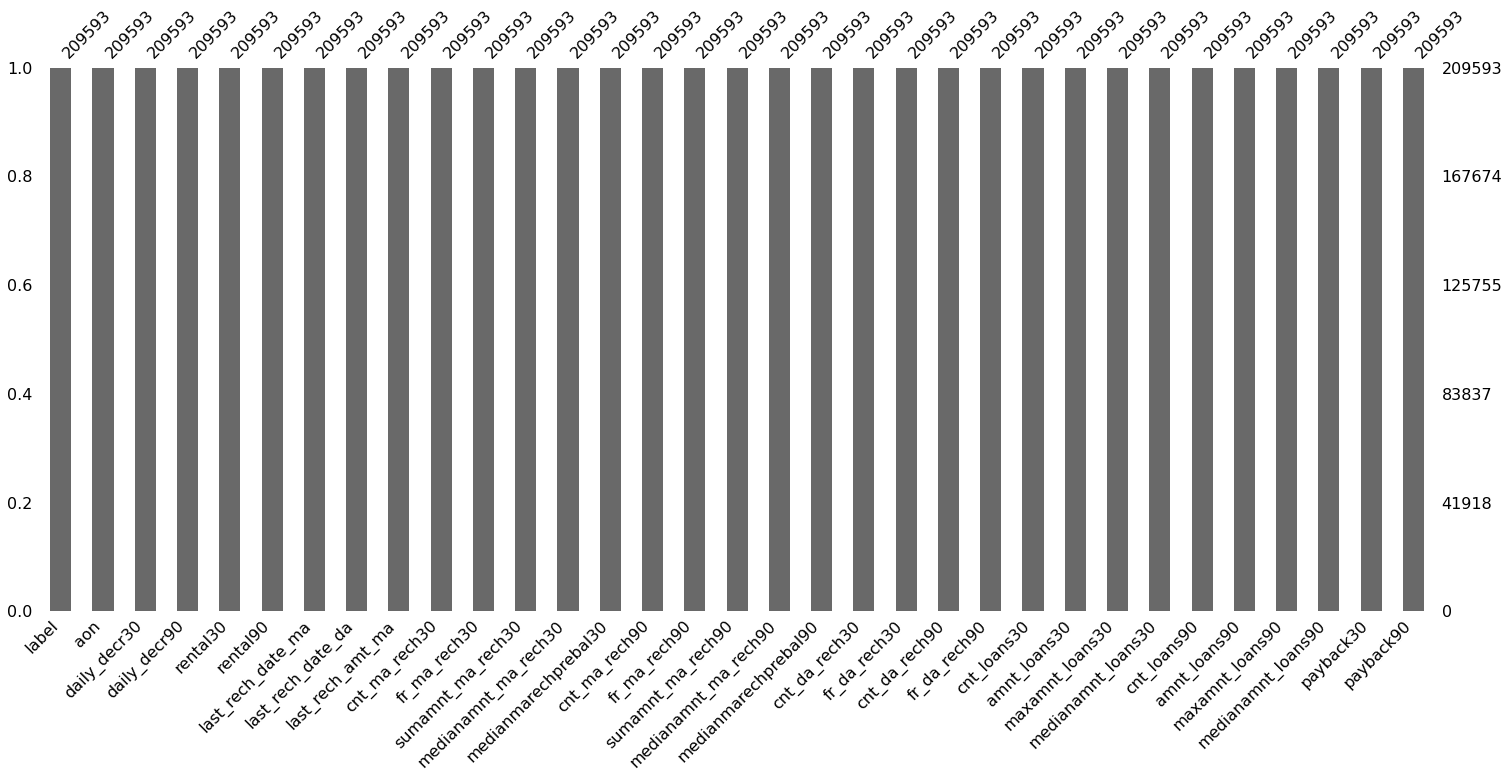

In [12]:
import missingno as msno

msno.bar(df)
plt.show()


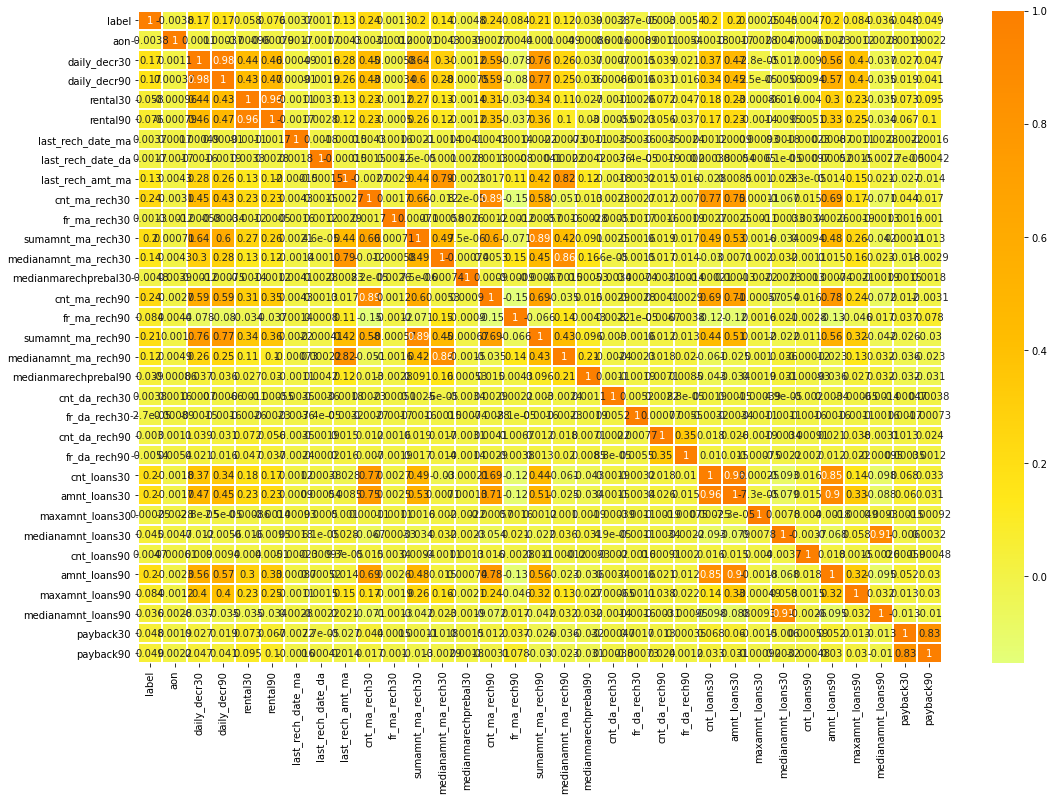

In [13]:
plt.figure(figsize = (18, 12))

corr = df.corr()

sns.heatmap(data = corr,cmap='Wistia', annot = True, fmt = '.2g', linewidth = 1)
plt.show()


In [14]:
df.nunique()

label                        2
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback30                 1363
payback9

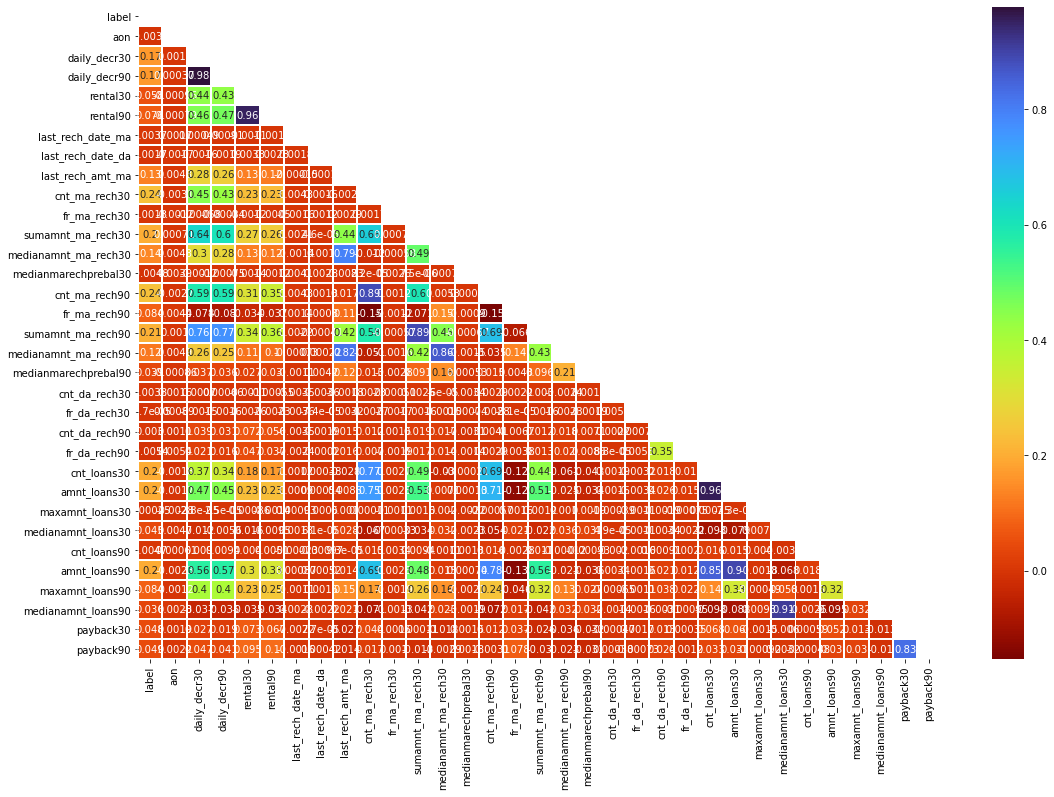

In [15]:
plt.figure(figsize = (18, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask,cmap='turbo_r', annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [16]:
X = df.drop('label', axis = 1)
y = df['label']

In [17]:
cat_df = X.select_dtypes(include = ['object'])

In [18]:
cat_df.head()

""
0
1
2
3
4


In [20]:
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

In [21]:
num_df = X.select_dtypes(include = ['int64'])
num_df.head()

,last_rech_amt_ma,cnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,amnt_loans90,maxamnt_loans90
0,1539,2,2,21,3078,0,0,2,12,12,6
1,5787,1,1,0,5787,0,0,1,12,12,12
2,1539,1,1,0,1539,0,0,1,6,6,6
3,947,0,1,0,947,0,0,2,12,12,6
4,2309,7,8,2,23496,0,0,7,42,42,6


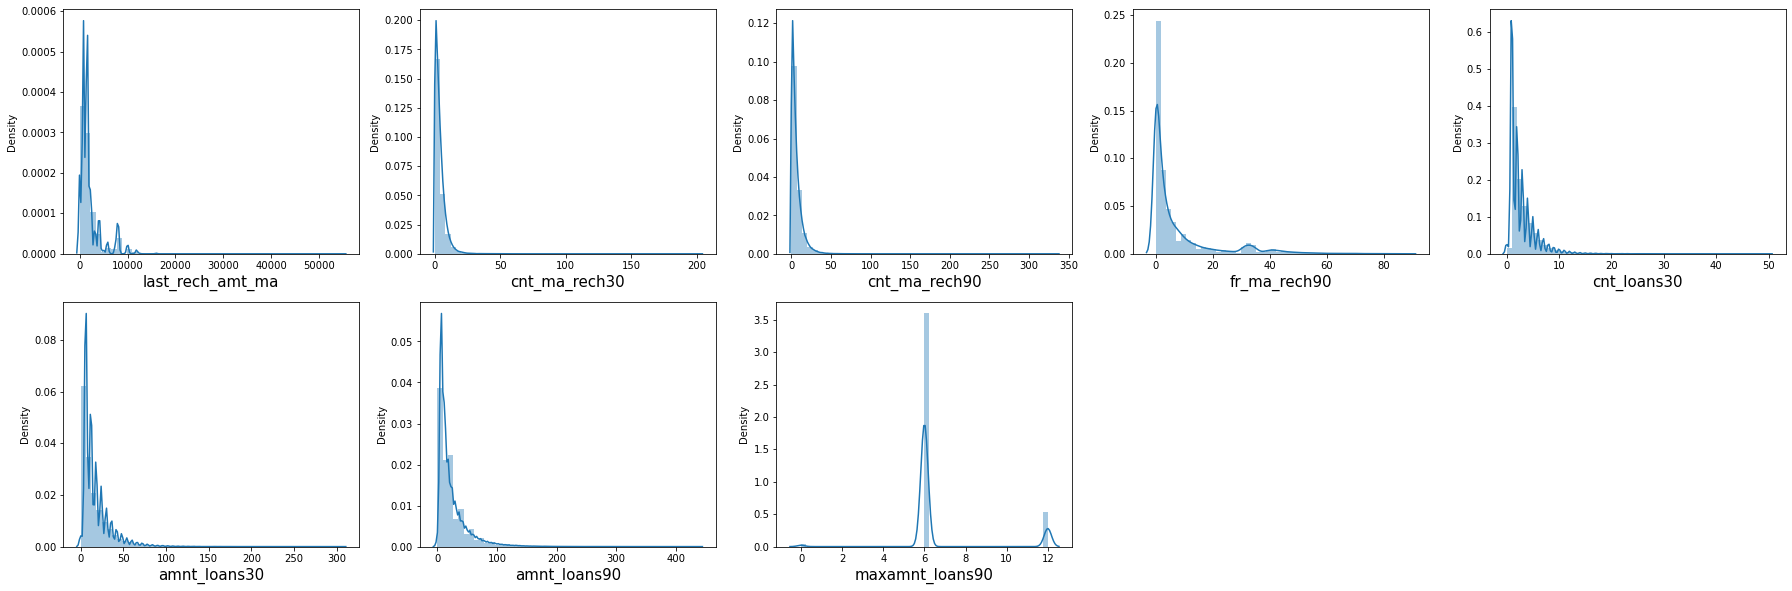

In [23]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()


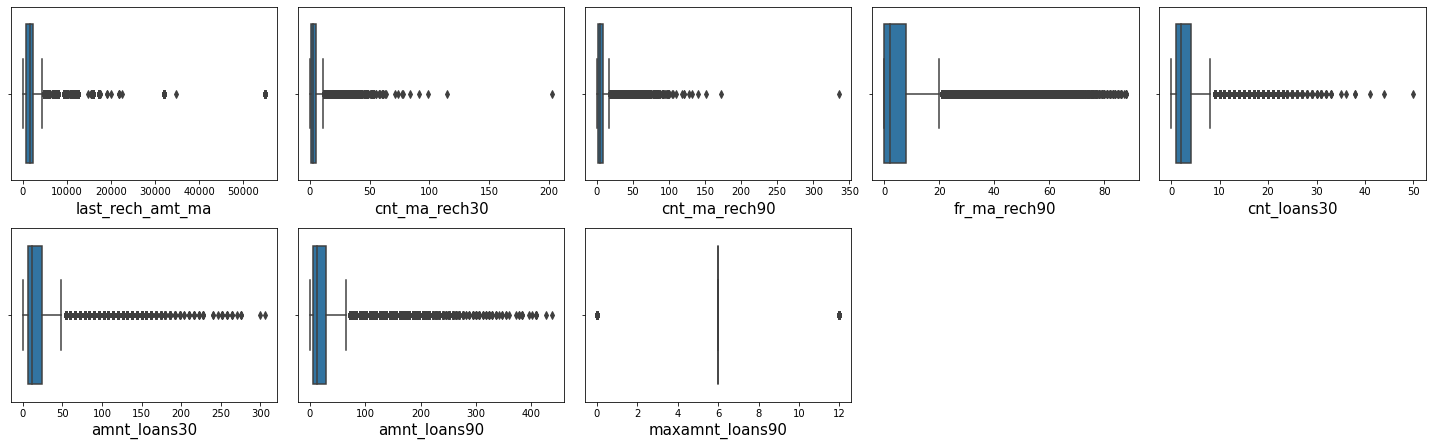

In [24]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [25]:
X

,last_rech_amt_ma,cnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,cnt_loans30,amnt_loans30,amnt_loans90,maxamnt_loans90
0,1539,2,2,21,2,12,12,6
1,5787,1,1,0,1,12,12,12
2,1539,1,1,0,1,6,6,6
3,947,0,1,0,2,12,12,6
4,2309,7,8,2,7,42,42,6
...,...,...,...,...,...,...,...,...
209588,4048,3,3,2,2,12,12,6
209589,773,4,6,2,3,18,18,6
209590,1539,5,11,5,4,42,54,12
209591,773,5,6,4,2,18,24,12


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [27]:
X_train

,last_rech_amt_ma,cnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,cnt_loans30,amnt_loans30,amnt_loans90,maxamnt_loans90
183970,1539,7,8,1,3,18,18,6
201226,1539,6,6,6,5,30,30,6
116428,8000,1,3,42,1,6,12,6
116707,2309,3,3,24,1,6,6,6
81192,773,3,3,7,1,6,6,6
...,...,...,...,...,...,...,...,...
130771,770,3,3,9,2,12,12,6
137972,770,4,9,4,1,6,6,6
11176,770,6,8,2,2,12,12,6
183540,770,3,5,4,3,18,24,6


In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(157194, 8)
(52399, 8)
(157194,)
(52399,)


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_train_scale

array([[-0.22069456,  0.71117538,  0.23578082, ...,  0.00407214,
        -0.21160348, -0.33390562],
       [-0.22069456,  0.47638279, -0.04199902, ...,  0.69422355,
         0.24105321, -0.33390562],
       [ 2.48845659, -0.69758019, -0.45866877, ..., -0.68607927,
        -0.43793183, -0.33390562],
       ...,
       [-0.54314266,  0.47638279,  0.23578082, ..., -0.34100357,
        -0.43793183, -0.33390562],
       [-0.54314266, -0.227995  , -0.18088893, ...,  0.00407214,
         0.01472486, -0.33390562],
       [-0.54314266,  1.88513837,  3.8469187 , ...,  1.38437496,
         2.27800833,  2.52071779]])

In [31]:
X_train_scale_df = pd.DataFrame(data = X_train_scale, columns = X_train.columns)
X_train_scale_df

,last_rech_amt_ma,cnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,cnt_loans30,amnt_loans30,amnt_loans90,maxamnt_loans90
0,-0.220695,0.711175,0.235781,-0.532504,0.095816,0.004072,-0.211603,-0.333906
1,-0.220695,0.476383,-0.041999,-0.135209,0.878446,0.694224,0.241053,-0.333906
2,2.488457,-0.697580,-0.458669,2.725320,-0.686814,-0.686079,-0.437932,-0.333906
3,0.102173,-0.227995,-0.458669,1.295056,-0.686814,-0.686079,-0.664260,-0.333906
4,-0.541885,-0.227995,-0.458669,-0.055749,-0.686814,-0.686079,-0.664260,-0.333906
...,...,...,...,...,...,...,...,...
157189,-0.543143,-0.227995,-0.458669,0.103169,-0.295499,-0.341004,-0.437932,-0.333906
157190,-0.543143,0.006798,0.374671,-0.294127,-0.686814,-0.686079,-0.664260,-0.333906
157191,-0.543143,0.476383,0.235781,-0.453045,-0.295499,-0.341004,-0.437932,-0.333906
157192,-0.543143,-0.227995,-0.180889,-0.294127,0.095816,0.004072,0.014725,-0.333906


In [32]:
x_test_scale = scaler.fit_transform(X_test)
x_test_scale

array([[-5.54913547e-01,  2.15692881e-04, -3.28215231e-01, ...,
        -3.46880081e-01, -4.46054342e-01, -3.35128480e-01],
       [ 2.34718762e+00,  2.35675928e-01, -4.94227611e-02, ...,
        -3.46880081e-01, -4.46054342e-01, -3.35128480e-01],
       [ 3.15218134e+00, -7.06165012e-01, -7.46403937e-01, ...,
        -6.92579220e-01, -6.73775084e-01, -3.35128480e-01],
       ...,
       [ 1.60018438e+00, -7.06165012e-01, -7.46403937e-01, ...,
        -6.92579220e-01, -6.73775084e-01, -3.35128480e-01],
       [-5.54913547e-01, -2.35244542e-01, -4.67611467e-01, ...,
        -1.18094135e-03, -2.18333601e-01, -3.35128480e-01],
       [-8.85674041e-01, -9.41625247e-01, -8.85800172e-01, ...,
        -6.92579220e-01, -6.73775084e-01, -3.35128480e-01]])

In [33]:
x_test_scale_df = pd.DataFrame(data = x_test_scale, columns = X_test.columns)
x_test_scale_df

,last_rech_amt_ma,cnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,cnt_loans30,amnt_loans30,amnt_loans90,maxamnt_loans90
0,-0.554914,0.000216,-0.328215,-0.536455,-0.301978,-0.346880,-0.446054,-0.335128
1,2.347188,0.235676,-0.049423,-0.298464,-0.301978,-0.346880,-0.446054,-0.335128
2,3.152181,-0.706165,-0.746404,-0.615785,-0.693906,-0.692579,-0.673775,-0.335128
3,0.853181,-0.706165,0.508162,-0.457124,-0.693906,-0.692579,0.692549,-0.335128
4,-0.885674,-0.941625,-0.885800,-0.615785,-0.693906,-0.692579,-0.673775,-0.335128
...,...,...,...,...,...,...,...,...
52394,-0.885674,-0.941625,-0.885800,-0.615785,-0.693906,-0.692579,-0.673775,-0.335128
52395,0.479465,-0.235245,0.089973,-0.377794,-0.693906,-0.346880,-0.446054,2.508661
52396,1.600184,-0.706165,-0.746404,-0.615785,-0.693906,-0.692579,-0.673775,-0.335128
52397,-0.554914,-0.235245,-0.467611,0.415510,0.089951,-0.001181,-0.218334,-0.335128


In [34]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scale_df, y_train)

y_pred = svc.predict(x_test_scale_df)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Support Vector Classifier is : 0.8743463490972938
Test accuracy of Support Vector Classifier is : 0.8776694211721597
[[    0  6410]
 [    0 45989]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6410
           1       0.88      1.00      0.93     45989

    accuracy                           0.88     52399
   macro avg       0.44      0.50      0.47     52399
weighted avg       0.77      0.88      0.82     52399



In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


In [37]:
knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 0.8708220415537489
Test accuracy of KNN is : 0.8727838317525144
[[  448  5962]
 [  704 45285]]
              precision    recall  f1-score   support

           0       0.39      0.07      0.12      6410
           1       0.88      0.98      0.93     45989

    accuracy                           0.87     52399
   macro avg       0.64      0.53      0.52     52399
weighted avg       0.82      0.87      0.83     52399



In [38]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [39]:
dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Training accuracy of Decision Tree is : 0.8892833059785997
Test accuracy of Decision Tree is : 0.8513330407068838
[[  317  6093]
 [ 1697 44292]]
              precision    recall  f1-score   support

           0       0.16      0.05      0.08      6410
           1       0.88      0.96      0.92     45989

    accuracy                           0.85     52399
   macro avg       0.52      0.51      0.50     52399
weighted avg       0.79      0.85      0.82     52399



In [40]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [41]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.8743845185132079


In [42]:
dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

In [43]:
dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.8743845184930723
Test accuracy of Decision Tree is : 0.8777075898395007
[[    3  6407]
 [    1 45988]]
              precision    recall  f1-score   support

           0       0.75      0.00      0.00      6410
           1       0.88      1.00      0.93     45989

    accuracy                           0.88     52399
   macro avg       0.81      0.50      0.47     52399
weighted avg       0.86      0.88      0.82     52399



In [44]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

In [45]:
rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 0.8744544957186661
Test accuracy of Random Forest is : 0.8776694211721597
[[    3  6407]
 [    3 45986]]
              precision    recall  f1-score   support

           0       0.50      0.00      0.00      6410
           1       0.88      1.00      0.93     45989

    accuracy                           0.88     52399
   macro avg       0.69      0.50      0.47     52399
weighted avg       0.83      0.88      0.82     52399



In [46]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=5,
                                                                                min_samples_leaf=5)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [47]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.001, 'n_estimators': 120}
0.8743908800387017


In [48]:
ada = grid_search.best_estimator_

y_pred = ada.predict(X_test)

In [49]:
ada_train_acc = accuracy_score(y_train, ada.predict(X_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Ada Boost is : {ada_train_acc}")
print(f"Test accuracy of Ada Boost is : {ada_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Ada Boost is : 0.8743845184930723
Test accuracy of Ada Boost is : 0.8777075898395007
[[    3  6407]
 [    1 45988]]
              precision    recall  f1-score   support

           0       0.75      0.00      0.00      6410
           1       0.88      1.00      0.93     45989

    accuracy                           0.88     52399
   macro avg       0.81      0.50      0.47     52399
weighted avg       0.86      0.88      0.82     52399



In [50]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Support Vector Classifier', svc), ('KNN', knn),  ('Decision Tree', dtc), ('Random Forest', rand_clf),
               ('Ada Boost', ada),]

vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

In [51]:
vc_train_acc = accuracy_score(y_train, vc.predict(X_train))
vc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Voting Classifier is : {vc_train_acc}")
print(f"Test accuracy of Voting Classifier is : {vc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Voting Classifier is : 0.8743781569271092
Test accuracy of Voting Classifier is : 0.8777075898395007
[[    3  6407]
 [    1 45988]]
              precision    recall  f1-score   support

           0       0.75      0.00      0.00      6410
           1       0.88      1.00      0.93     45989

    accuracy                           0.88     52399
   macro avg       0.81      0.50      0.47     52399
weighted avg       0.86      0.88      0.82     52399



In [52]:
models = pd.DataFrame({
    'Model' : ['SVC', 'KNN', 'Decision Tree', 'Random Forest','Ada Boost',
             'Voting Classifier'],
    'Score' : [svc_test_acc, knn_test_acc, dtc_test_acc, rand_clf_test_acc, ada_test_acc, vc_test_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Decision Tree,0.877708
4,Ada Boost,0.877708
5,Voting Classifier,0.877708
0,SVC,0.877669
3,Random Forest,0.877669
1,KNN,0.872784


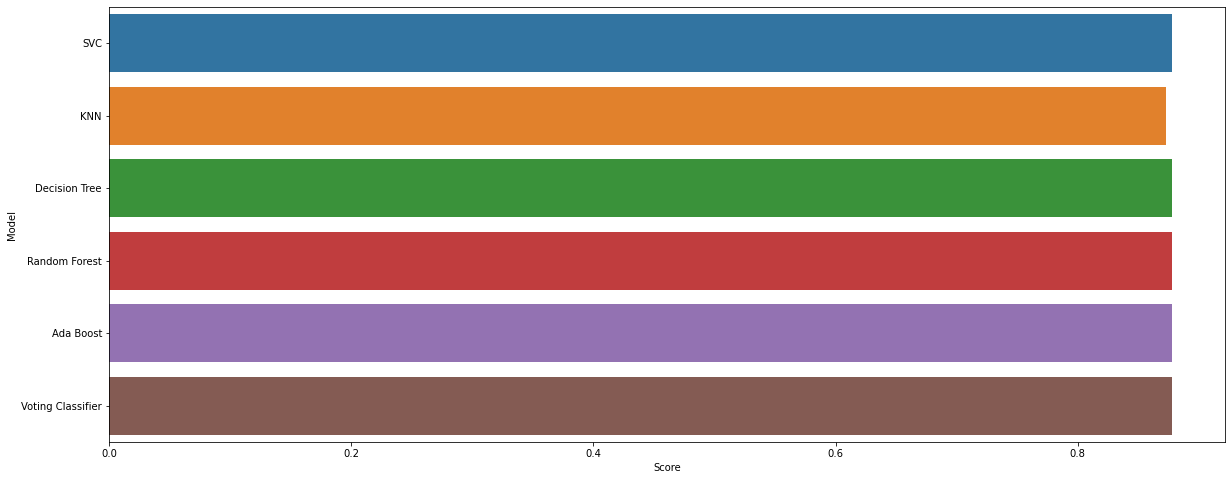

In [53]:
plt.figure(figsize = (20, 8))

sns.barplot(x = 'Score', y = 'Model', data = models)
plt.show()

In [55]:
import joblib
joblib.dump(models,'models.pkl')

['models.pkl']